In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [2]:
np.random.seed(sum(map(ord, "网格图表的绘制")))

In [3]:
#加载tips数据
tips = sb.load_dataset("tips")

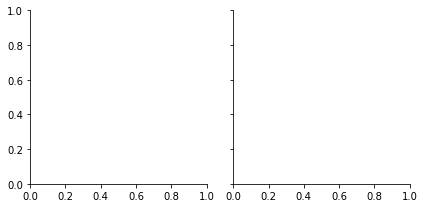

In [4]:
#使用FacetGrid初始化多面图表和坐标轴，但是不绘制任何东西
g = sb.FacetGrid(tips, col="time")

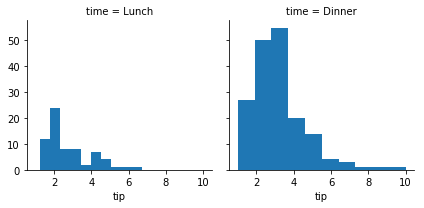

In [5]:
#要绘制图形，需要使用FacetGrid上的map方法依次进行绘制
g = sb.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

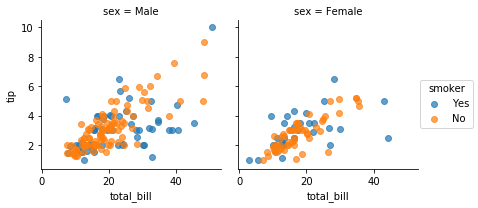

In [6]:
#可以看到map方法将会给图表的坐标轴添加文字信息,当然也可以在FacetGrid对象上调用add_legend方法增加图例信息
g = sb.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

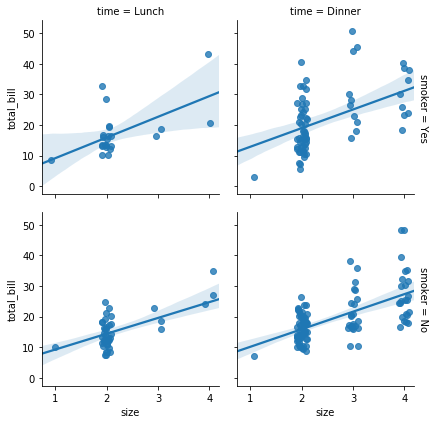

In [7]:
#在初始化FacetGrid的时候，可以通过row和col指定网格的行和列
g = sb.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sb.regplot, "size", "total_bill", fit_reg=True, x_jitter=.1)

D:\softwares\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


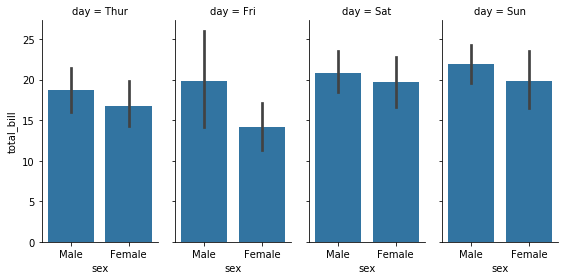

In [8]:
#通过aspect指定宽高比
g = sb.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sb.barplot, "sex", "total_bill")

In [9]:
#对于网格中的每个图，都可以个性化的指定宽高比
titanic = sb.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")

D:\softwares\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


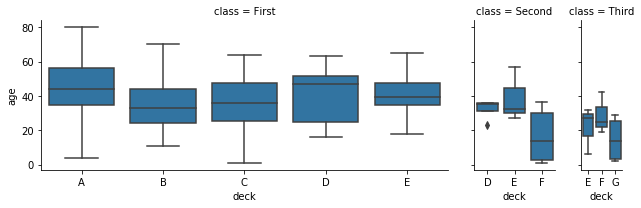

In [10]:
g = sb.FacetGrid(titanic, col="class", sharex=False,gridspec_kws={"width_ratios": [10, 2, 1]})
g.map(sb.boxplot, "deck", "age")

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


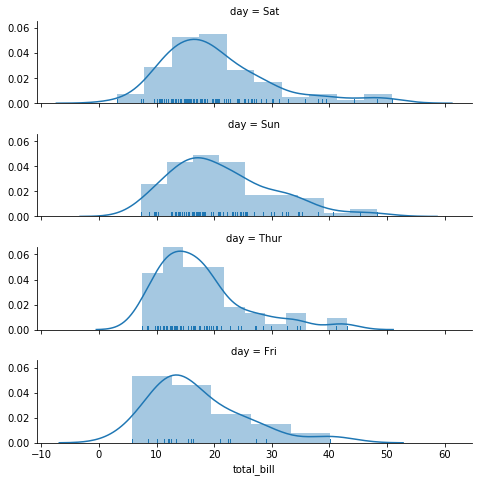

In [11]:
#通过rug增加“小胡须”,hist增加条形图
ordered_days = tips.day.value_counts().index
print(ordered_days)
g = sb.FacetGrid(tips, row="day", row_order=ordered_days, size=1.7, aspect=4,)
g.map(sb.distplot, "total_bill", hist=True, rug=True)

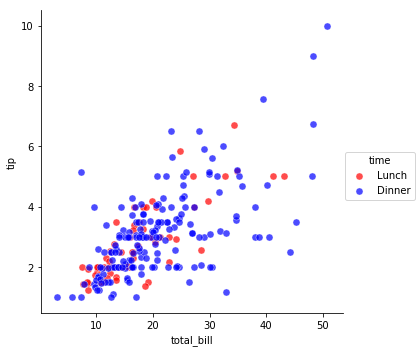

In [12]:
#指定颜色面板,构造一个字典
pal = dict(Lunch="red", Dinner="blue")
g = sb.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()

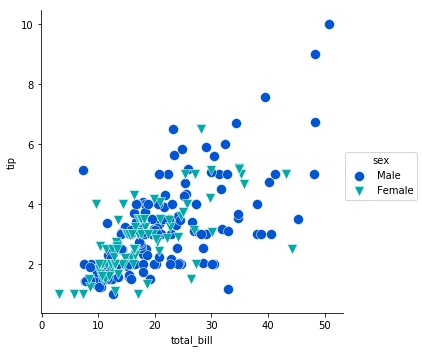

In [13]:
#通过关键字参数hue_kws指定不同的marker形状
g = sb.FacetGrid(tips, hue="sex", palette="winter", size=5, hue_kws={"marker": ["o", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

D:\softwares\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


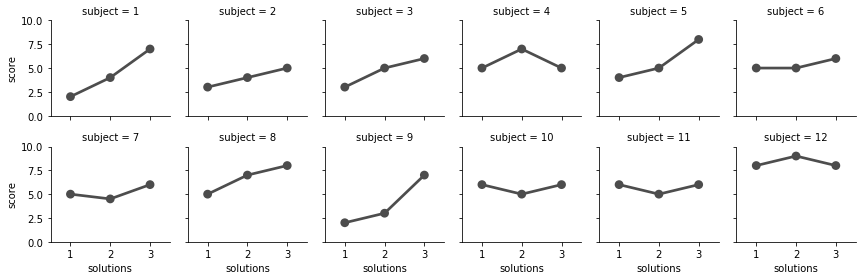

In [14]:
#如果一行有很多个类别，所有的图都画在一行上面可定不好看，可以使用col_wrap进行自动的换行
attend = sb.load_dataset("attention").query("subject <= 12")
g = sb.FacetGrid(attend, col="subject", col_wrap=6, size=2, ylim=(0, 10))
g.map(sb.pointplot, "solutions", "score", color=".3")

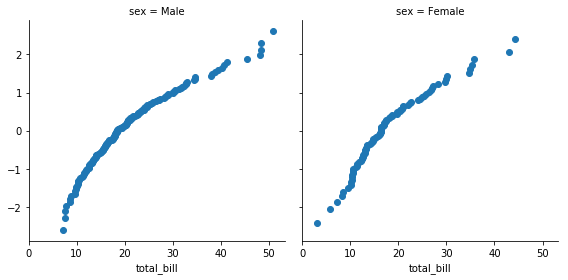

In [15]:
#用户自定义的函数，传递给map方法进行图表的绘制
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sb.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill")

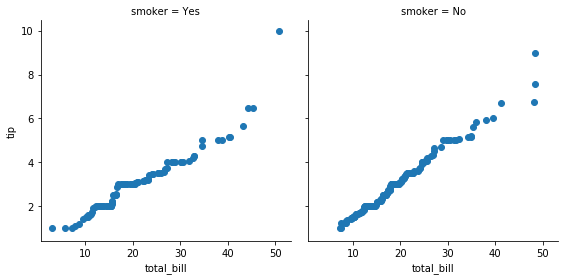

In [16]:
#通过自定义函数，绘制多变量的图表
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sb.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip")

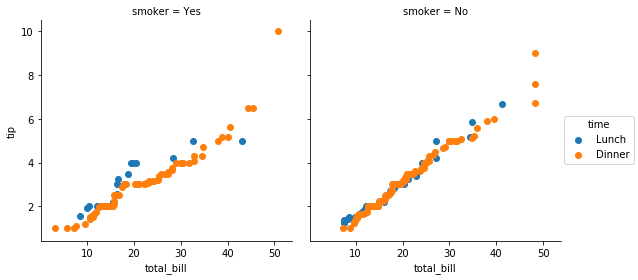

In [17]:
#通过Hue关键字参数指定颜色分类
g = sb.FacetGrid(tips, hue="time", col="smoker", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

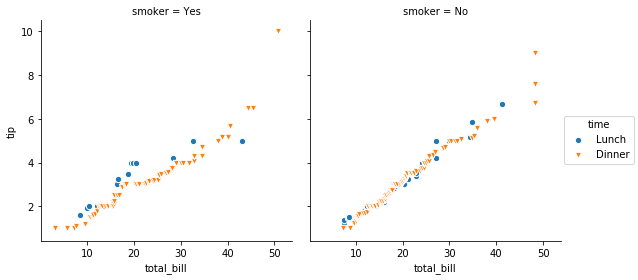

In [18]:
#hue_kws指定形状
g = sb.FacetGrid(tips, hue="time", col="smoker", size=4,hue_kws={"marker": ["o", "v"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend()

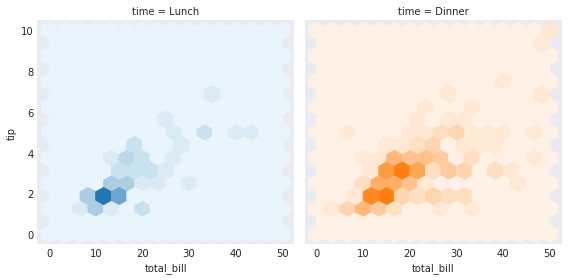

In [19]:
#绘制蜂窝图
def hexbin(x, y, color, **kwargs):
    cmap = sb.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sb.axes_style("dark"):
    g = sb.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])

### 绘制数据集中两两属性之间的关系图

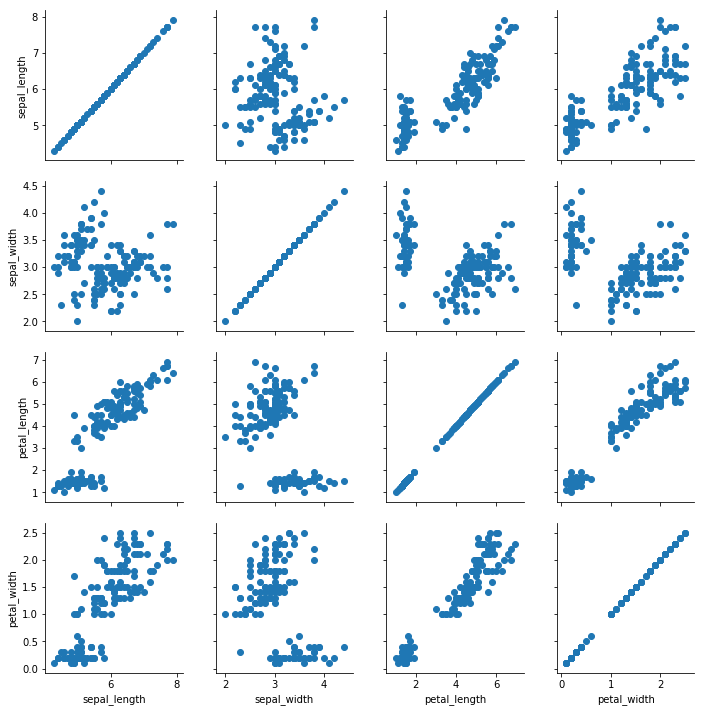

In [20]:
#使用pairgrid方法
iris = sb.load_dataset("iris")
g = sb.PairGrid(iris)
g.map(plt.scatter)

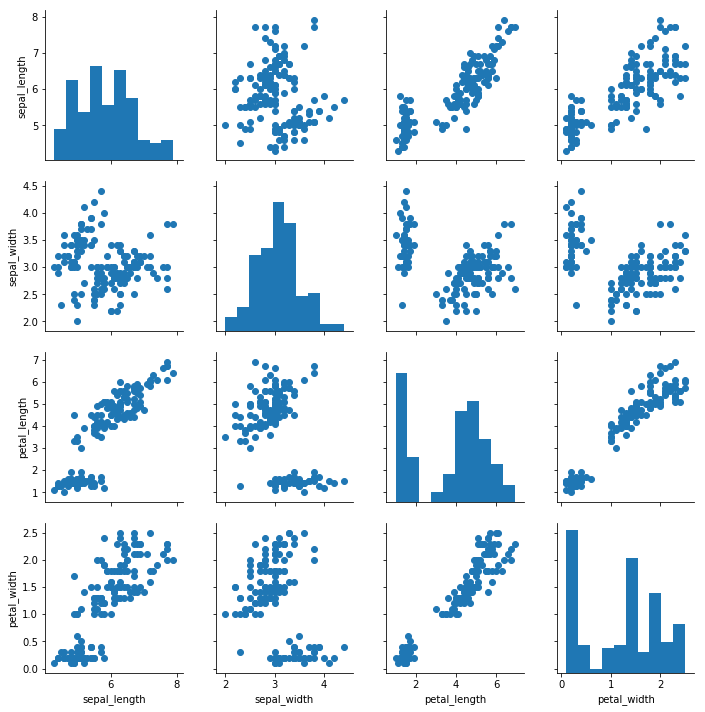

In [21]:
#设置对角线及非对角线上图表的样式
g = sb.PairGrid(iris)
#对角线上为条形图
g.map_diag(plt.hist)
#非对角线上为散点图
g.map_offdiag(plt.scatter)

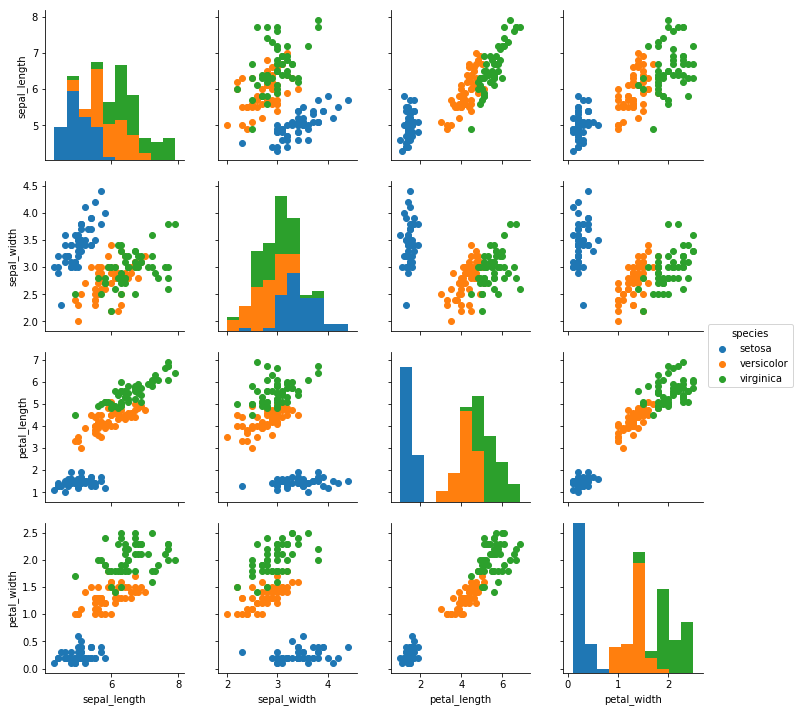

In [22]:
#用关键字参数hue指定分类，并用add_legend方法增加图例
g = sb.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

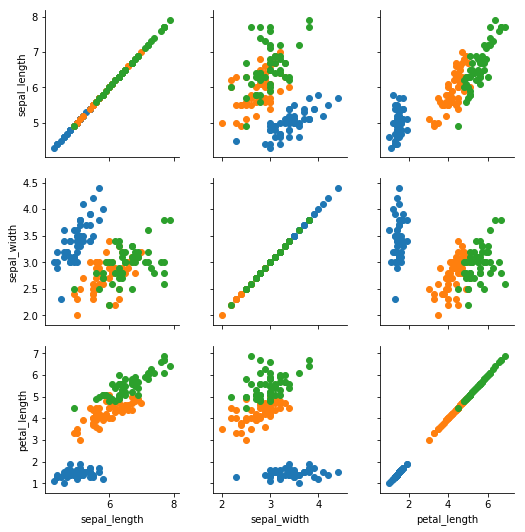

In [23]:
#指定变量个数
g = sb.PairGrid(iris, vars=["sepal_length", "sepal_width",'petal_length'], hue="species")
g.map(plt.scatter)

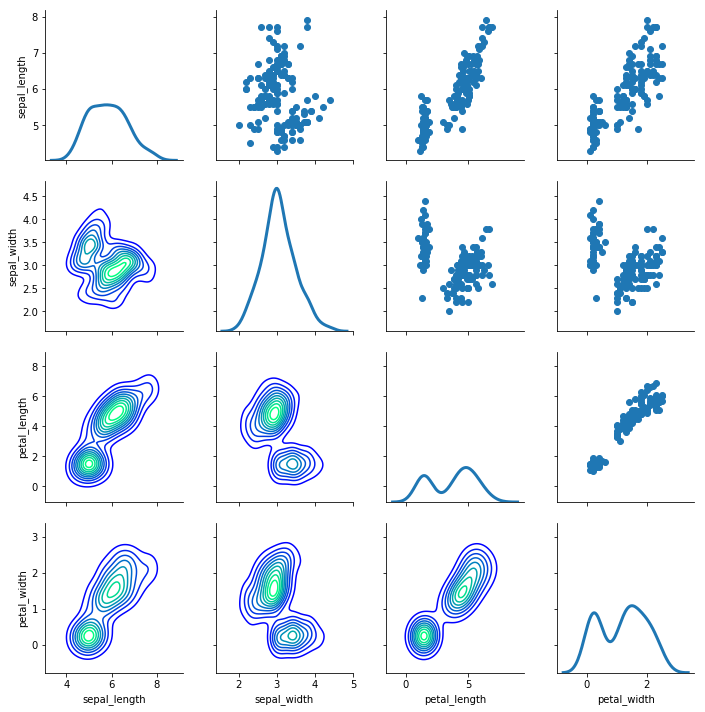

In [24]:
#指定网格上下两部分为不同的风格样式
g = sb.PairGrid(iris)
#上部分为散点图
g.map_upper(plt.scatter)
#下部分为带核密度函数的图
g.map_lower(sb.kdeplot, cmap="winter")
#指定对角线上的图为带核密度估计的图标
g.map_diag(sb.kdeplot, lw=3, legend=False)

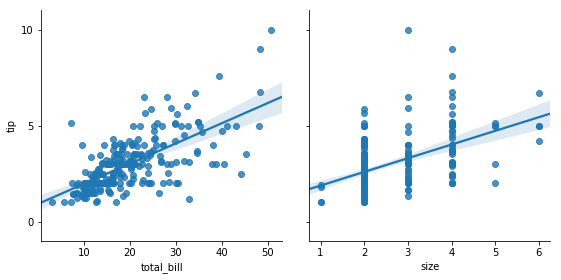

In [25]:
#指定网格的x和y变量
g = sb.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=4)
g.map(sb.regplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

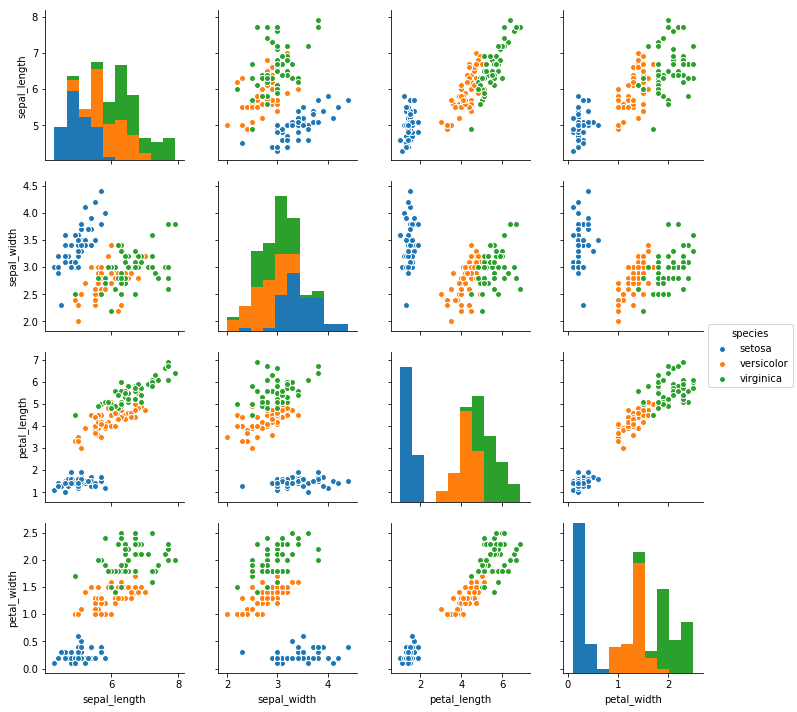

In [26]:
#很多时候可以使用pairplot来快速可视化数据
sb.pairplot(iris, hue="species", size=2.5)

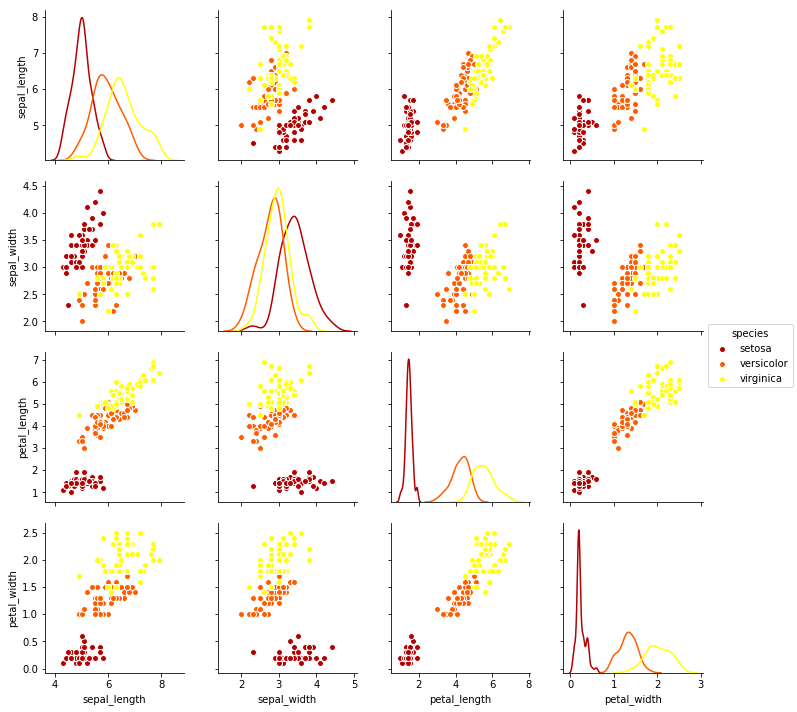

In [27]:
#可以通过关键字参数指定对角线上图表类型
g = sb.pairplot(iris, hue="species", palette="hot", diag_kind="kde", size=2.5)